# **Perceptron Multi-Class Classification**

This notebook implements a multi-class perceptron algorithm for wine classification. The code utilizes the popular machine learning libraries such as Pandas, NumPy, and scikit-learn for dataset manipulation, splitting, and evaluation. Dataset: https://archive.ics.uci.edu/dataset/109/wine

The perceptron is trained on three binary classification tasks (1 vs 2,3; 2 vs 1,3; 3 vs 1,2) with a customizable number of iterations. The training process is visualized, showing the accuracy progression on both training and validation sets.

The script evaluates the trained perceptron on a separate test set, computing accuracy and generating a confusion matrix. Additionally, classification reports for each class are provided. The implemented algorithm supports confidence estimation, allowing users to inspect the confidence level of predictions.

The final section of the code includes visualization of the training process, showcasing accuracy improvements over iterations for each binary classification task.

Note: Ensure that the required libraries are installed, and the paths to the dataset files are correctly specified in the script before execution.

# **Importing**

## Libraries

In [ ]:
import pandas as pd
import numpy as np

from statistics import mode

from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

from sklearn.metrics import classification_report
import seaborn as sns

import random

## Dataset

In [ ]:
from google.colab import drive

drive.mount('/drive')

Mounted at /drive


In [ ]:
train_dataset = pd.read_csv("/drive/My Drive/Colab Notebooks/Wine dataset/train.csv")
validation_dataset = pd.read_csv("/drive/My Drive/Colab Notebooks/Wine dataset/test.csv")
test_dataset = pd.read_csv("/drive/My Drive/Colab Notebooks/Wine dataset/validation.csv")

# **Dataset Manipulation**

In [ ]:
X_test = test_dataset
y_test = test_dataset.pop('class')

train_dataset_1_vs_23 = train_dataset.copy()
validation_dataset_1_vs_23 =validation_dataset.copy()
train_dataset_1_vs_23['class'] = train_dataset_1_vs_23['class'].replace([2,3], 4)
validation_dataset_1_vs_23['class'] = validation_dataset_1_vs_23['class'].replace([2,3], 4)

train_dataset_2_vs_13 = train_dataset.copy()
validation_dataset_2_vs_13 =validation_dataset.copy()
train_dataset_2_vs_13['class'] = train_dataset_2_vs_13['class'].replace([1,3], 4)
validation_dataset_2_vs_13['class'] = validation_dataset_2_vs_13['class'].replace([1,3], 4)

train_dataset_3_vs_12 = train_dataset.copy()
validation_dataset_3_vs_12 =validation_dataset.copy()
train_dataset_3_vs_12['class'] = train_dataset_3_vs_12['class'].replace([1,2], 4)
validation_dataset_3_vs_12['class'] = validation_dataset_3_vs_12['class'].replace([1,2], 4)

In [ ]:
validation_dataset_3_vs_12

,Unnamed: 0,class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,88,4,12.08,1.33,2.30,23.6,70,2.20,1.59,0.42,1.38,1.74,1.07,3.21,625
1,147,3,13.32,3.24,2.38,21.5,92,1.93,0.76,0.45,1.25,8.42,0.55,1.62,650
2,153,3,12.58,1.29,2.10,20.0,103,1.48,0.58,0.53,1.40,7.60,0.58,1.55,640
3,78,4,12.70,3.87,2.40,23.0,101,2.83,2.55,0.43,1.95,2.57,1.19,3.13,463
4,71,4,13.49,1.66,2.24,24.0,87,1.88,1.84,0.27,1.03,3.74,0.98,2.78,472
5,16,4,13.83,1.57,2.62,20.0,115,2.95,3.40,0.40,1.72,6.60,1.13,2.57,1130
6,128,4,12.04,4.30,2.38,22.0,80,2.10,1.75,0.42,1.35,2.60,0.79,2.57,580
7,33,4,13.51,1.80,2.65,19.0,110,2.35,2.53,0.29,1.54,4.20,1.10,2.87,1095
8,102,4,11.82,1.72,1.88,19.5,86,2.50,1.64,0.37,1.42,2.06,0.94,2.44,415
9,45,4,14.38,3.59,2.28,16.0,102,3.25,3.17,0.27,2.19,4.90,1.04,3.44,1065


In [ ]:
X_train_1_vs_23 = train_dataset_1_vs_23
y_train_1_vs_23 = X_train_1_vs_23.pop('class')
X_validation_1_vs_23 = validation_dataset_1_vs_23
y_validation_1_vs_23 = X_validation_1_vs_23.pop('class')

X_train_2_vs_13 = train_dataset_2_vs_13
y_train_2_vs_13 = X_train_2_vs_13.pop('class')
X_validation_2_vs_13 = validation_dataset_2_vs_13
y_validation_2_vs_13 = X_validation_2_vs_13.pop('class')

X_train_3_vs_12 = train_dataset_3_vs_12
y_train_3_vs_12 = X_train_3_vs_12.pop('class')
X_validation_3_vs_12 = validation_dataset_3_vs_12
y_validation_3_vs_12 = X_validation_3_vs_12.pop('class')

# **Algorithm implementation**

## Trainning function


In [ ]:
def predict(w, X, sample):
    # Inject the bias column.
    X = np.asarray(X)
    X = np.concatenate((X, np.asarray([[1] * X.shape[0]]).T), axis=1)

    results = (X @ w > 0)
    confidence = X @ w
    prediction = []
    for result in results:
      if result == True:
        prediction.append(sample[0])
      else:
        prediction.append(sample[1])


    return prediction, confidence

In [ ]:
def fit(max_iters, X_t, y_t, X_v, y_v, sample):
        # Initialize random weights.
        w = np.random.random(X_t.shape[1] + 1)

        #Checking model result ith random weights

        zero_prediction_train, zero_confidence_train = predict(w, X_t, sample)
        zero_accurance_train = np.sum(zero_prediction_train == y_t.values) / len(y_t.values)

        zero_prediction_validation, zero_confidence_validation = predict(w, X_v, sample)
        zero_accurance_validation = np.sum(zero_prediction_validation == y_v.values) / len(y_v.values)

        history_accurances = [[zero_accurance_train], [zero_accurance_validation]]

        print(f"0 iteration: train accuranacy {zero_accurance_train:.2%}, validation accurancy {zero_accurance_validation:.2%}")

        # Bookkeeping.
        X_t, y_t = np.asarray(X_t), np.asarray(y_t)
        iters = 0

        # Insert a bias column.
        X_t = np.concatenate((X_t, np.asarray([[1] * X_t.shape[0]]).T), axis=1)

        # Train as many rounds as allotted, or until fully converged.
        for _ in range(max_iters):
            y_pred_all = []
            for idx in range(X_t.shape[0]):
                x_sample, y_sample = X_t[idx], y_t[idx]

                if np.sum(w * x_sample) >= 0:
                  y_pred = sample[0]
                else:
                  y_pred = sample[1]

                #print(w * x_sample)
                if y_pred == y_sample:
                    pass
                elif y_pred == sample[1] and y_sample == sample[0]:
                    w = w + x_sample
                elif y_pred == sample[0] and y_sample == sample[1]:
                    w = w - x_sample

                y_pred_all.append(y_pred)

            iters += 1

            # Learning progress check
            prediction_validation, confidence_validation = predict(w, X_v, sample)
            accurance_validation = np.sum(prediction_validation == y_v) / len(y_v)

            accurance_train = np.sum(y_pred_all == y_t) / len(y_t)

            history_accurances[0].append(accurance_train)
            history_accurances[1].append(accurance_validation)

            sum_text = f"\n{iters} iteration: train accuranacy {accurance_train:.2%}, validation accurancy {accurance_validation:.2%}\n"
            print("_"*len(sum_text) + sum_text + "_"*len(sum_text))

            if np.equal(np.array(y_pred_all), y_t).all():
                break

        return w, history_accurances


In [ ]:
print("**********************************************************************1_vs_23**********************************************************************")
weights_1_vs_23, training_process_history_1_vs_23 = fit(15, X_train_1_vs_23, y_train_1_vs_23, X_validation_1_vs_23, y_validation_1_vs_23, [1, 4])
print("**********************************************************************2_vs_13**********************************************************************")
weights_2_vs_13, training_process_history_2_vs_13 = fit(15, X_train_2_vs_13, y_train_2_vs_13, X_validation_2_vs_13, y_validation_2_vs_13, [2, 4])
print("**********************************************************************3_vs_12**********************************************************************")
weights_3_vs_12, training_process_history_3_vs_12 = fit(15, X_train_3_vs_12, y_train_3_vs_12, X_validation_3_vs_12, y_validation_3_vs_12, [3, 4])

**********************************************************************1_vs_23**********************************************************************
0 iteration: train accuranacy 33.06%, validation accurancy 30.56%
___________________________________________________________________
1 iteration: train accuranacy 79.03%, validation accurancy 97.22%
___________________________________________________________________
____________________________________________________________________
2 iteration: train accuranacy 79.84%, validation accurancy 100.00%
____________________________________________________________________
___________________________________________________________________
3 iteration: train accuranacy 88.71%, validation accurancy 88.89%
___________________________________________________________________
____________________________________________________________________
4 iteration: train accuranacy 87.90%, validation accurancy 100.00%
_________________________________________

## Perceptron confidence

In [ ]:
confidence_1_vs_23 = training_process_history_1_vs_23[0][-1]
confidence_2_vs_13 = training_process_history_2_vs_13[0][-1]
confidence_3_vs_12 = training_process_history_3_vs_12[0][-1]

confidences = [confidence_1_vs_23, confidence_2_vs_13, confidence_3_vs_12]

print(confidences)

[0.9435483870967742, 0.6854838709677419, 0.7741935483870968]


# **Testing algorithm**

## Testing for 15 iterations

In [ ]:
predictions_1_vs_23, confidence_1_vs_23 = predict(weights_1_vs_23, X_test, [1,4])
predictions_2_vs_13, confidence_2_vs_13 = predict(weights_2_vs_13, X_test, [2,4])
predictions_3_vs_12, confidence_3_vs_12 = predict(weights_3_vs_12, X_test, [3,4])

predictions_all = [predictions_1_vs_23, predictions_2_vs_13, predictions_3_vs_12]

#print(predictions_all)
#print(confidence_1_vs_23)
#print(confidence_2_vs_13)
#print(confidence_3_vs_12)

predictions = []

for i in range(y_test.size):
  iteretion_confidences = [confidence_1_vs_23[i], confidence_2_vs_13[i], confidence_3_vs_12[i]]
  predictions.append(np.argmax(iteretion_confidences)+1)

#print(predictions)
#print(y_test)

accurance = np.sum(predictions == y_test.values) / len(y_test.values)

print(f"Accurance for 15 iterations: {accurance:.2%}")

Accurance for 15 iterations: 88.24%


## Defining Confusion marrix

In [ ]:
def comp_confmat(actual, predicted):

    classes = np.unique(actual)

    confmat = np.zeros((len(classes), len(classes)))

    for i in range(len(classes)):
        for j in range(len(classes)):

           confmat[i, j] = np.sum((actual == classes[i]) & (predicted == classes[j]))

    return confmat

In [ ]:
con_matrix = comp_confmat(predictions, y_test)

In [ ]:
con_matrix

array([[6., 0., 0.],
       [0., 6., 1.],
       [0., 1., 3.]])

Text(0.5, 1.0, 'Model Accuracy Score: 88.24%')

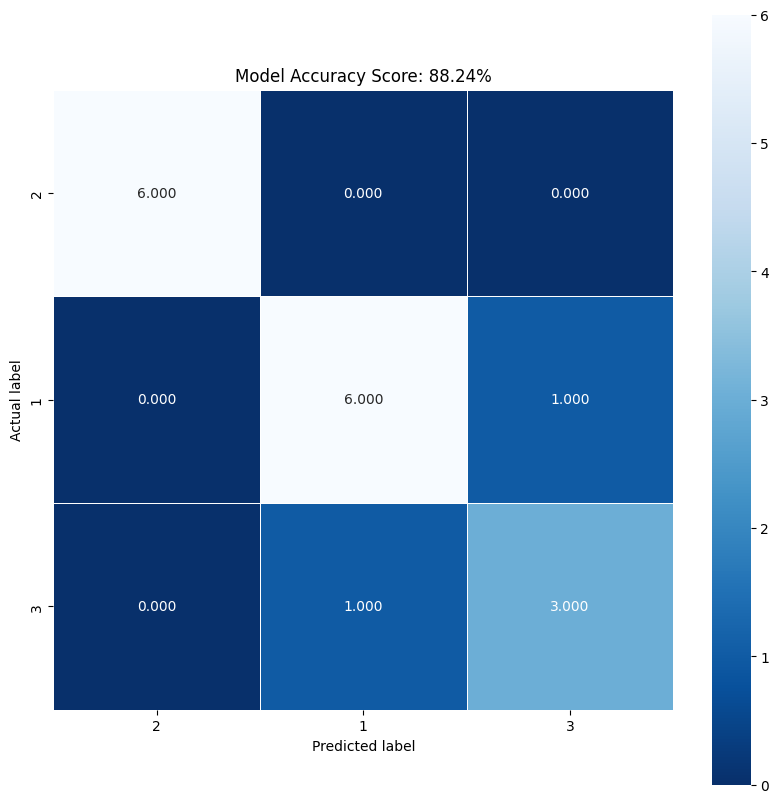

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(con_matrix, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r', yticklabels = y_test.unique(), xticklabels = y_test.unique())
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = f'Model Accuracy Score: {accurance:.2%}'
plt.title(all_sample_title)

In [ ]:
print(classification_report(y_test, predictions, target_names=['1', '2', '3']))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         6
           2       0.86      0.86      0.86         7
           3       0.75      0.75      0.75         4

    accuracy                           0.88        17
   macro avg       0.87      0.87      0.87        17
weighted avg       0.88      0.88      0.88        17



## Vizualization of training process

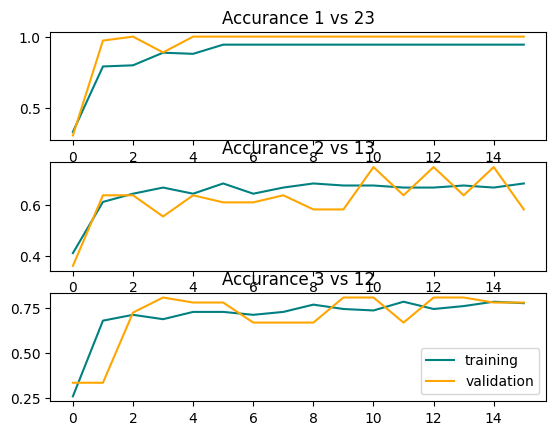

In [ ]:
#fig = plt.figure()

figure, axis = plt.subplots(3, 1)

axis[0].plot(training_process_history_1_vs_23[0], color='teal', label='training')
axis[0].plot(training_process_history_1_vs_23[1], color='orange', label='validation')
axis[0].set_title("Accurance 1 vs 23")

axis[1].plot(training_process_history_2_vs_13[0], color='teal', label='training')
axis[1].plot(training_process_history_2_vs_13[1], color='orange', label='validation')
axis[1].set_title("Accurance 2 vs 13")

axis[2].plot(training_process_history_3_vs_12[0], color='teal', label='training')
axis[2].plot(training_process_history_3_vs_12[1], color='orange', label='validation')
axis[2].set_title("Accurance 3 vs 12")

plt.legend(loc="lower right")
plt.show()